<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Kai/dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import networkx as nx

In [21]:
np.random.seed(0)
points = np.random.rand(20, 2)

tri = Delaunay(points)

point_weights = {i: 1024 for i in range(len(points))}

edge_weights = {}
for simplex in tri.simplices:
    for i in range(3):
        for j in range(i+1, 3):
            edge = tuple(sorted([simplex[i], simplex[j]]))
            if edge not in edge_weights:
                edge_weights[edge] = np.random.randint(1, 21)

G = nx.Graph()
for edge, weight in edge_weights.items():
    G.add_edge(edge[0], edge[1], weight=weight)

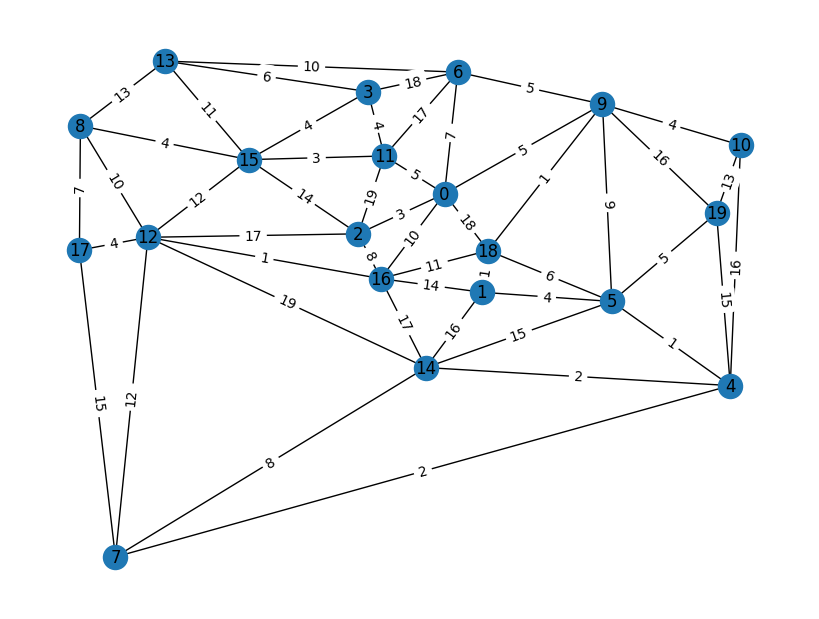

In [22]:
plt.figure(figsize=(8, 6))
pos = {i: points[i] for i in range(len(points))}
nx.draw(G, pos, with_labels=True, node_size=300)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()